# BNB Linked Data Platform

The [BNB Linked Data Platform](https://bnb.data.bl.uk/) provides access to the [British National Bibliography (BNB)](http://www.bl.uk/bibliographic/natbib.html) published as linked open data and made available through SPARQL services. 

This notebook explains how to query the repository and obtain places of publication (fields blt:publication and blt:projectedPublication ) to show an interactive map. Thanks that the works are linked to [GeoNames](https://www.geonames.org/), the records can be linked to external repositories. This notebook  obtains information from [Wikidata](https://www.wikidata.org), showing the benefits of Linked Open Data.

## Global configuration

In this section, you can set the author from the BNB by using its identifier. 

In [1]:
#bnbIdAuthor = 'http://bnb.data.bl.uk/id/person/DickensCharles1812-1870'
#bnbIdAuthor = 'https://bnb.data.bl.uk/doc/person/BlakeWilliam1757-1827'
bnbIdAuthor = 'http://bnb.data.bl.uk/id/person/ShakespeareWilliam1564-1616'

## Setting up things

In [2]:
import folium
import requests
import pandas as pd
import json
import csv
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize  

## Let's query the repository by asking the publications related to William Shakespeare
We will use the [SPARQL endpoint](https://bnb.data.bl.uk/flint-sparql) to create the query and configure the request to retrieve json as a result.

In [3]:
url = 'https://bnb.data.bl.uk/sparql'
query = """
PREFIX bibo: <http://purl.org/ontology/bibo/>
PREFIX bio: <http://purl.org/vocab/bio/0.1/>
PREFIX blt: <http://www.bl.uk/schemas/bibliographic/blterms#>
PREFIX dct: <http://purl.org/dc/terms/>
PREFIX event: <http://purl.org/NET/c4dm/event.owl#>
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX geo: <http://www.w3.org/2003/01/geo/wgs84_pos#>
PREFIX isbd: <http://iflastandards.info/ns/isbd/elements/>
PREFIX org: <http://www.w3.org/ns/org#>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX rdau: <http://rdaregistry.info/Elements/u/>
PREFIX madsrdf: <http://www.loc.gov/mads/rdf/v1#>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
PREFIX void: <http://rdfs.org/ns/void#>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX umbel: <http://umbel.org/umbel#>
PREFIX schema: <http://schema.org/>
PREFIX c4dm: <http://purl.org/NET/c4dm/event.owl#>

SELECT DISTINCT ?resource ?title ?date ?place WHERE {{
   graph <http://bnb.data.bl.uk/id/graph/BNBCIP> {{
      ?resource ?p <{0}> ;
         dct:title ?title ;
         schema:datePublished ?date .
      OPTIONAL {{
          ?resource blt:projectedPublication ?publication .
          ?publication c4dm:place ?place .
          FILTER regex(?place, "geonames", "i")        
      }}
      OPTIONAL {{
          ?resource blt:publication ?publication .
          ?publication c4dm:place ?place .
          FILTER regex(?place, "geonames", "i")        
      }}
   }}
}} LIMIT 500
"""

query = query.format(bnbIdAuthor)

# use json as a result
headers = {'Accept': 'application/sparql-results+json'}
r = requests.get(url, params = {'format': 'application/sparql-results+json', 'query': query}, headers=headers)
print('Elements retrieved!')

Elements retrieved!


## Save as a CSV 

In [4]:
bnbdata = json.loads(r.text)

csv_out = csv.writer(open('bnb_records.csv', 'w'), delimiter = ',', quotechar = '"', quoting = csv.QUOTE_MINIMAL)
csv_out.writerow(['resource', 'place', 'title', 'date'])

for i in bnbdata['results']['bindings']:
    resource = place = title = date =''
    
    resource = i['resource']['value']
    place = i['place']['value']
    title = i['title']['value']
    date = i['date']['value']
    
    csv_out.writerow([resource,place,title,date])

## Exploring the data

In [5]:
# Load the CSV file from GitHub.
# This puts the data in a Pandas DataFrame
df = pd.read_csv('bnb_records.csv')

In [6]:
df

,resource,place,title,date
0,http://bnb.data.bl.uk/id/resource/013310275,http://sws.geonames.org/6269131/,Macbeth : teachit KS3 interactive pack,2006-01
1,http://bnb.data.bl.uk/id/resource/013310276,http://sws.geonames.org/6269131/,Much ado about nothing : teachit KS3 interacti...,2006-01
2,http://bnb.data.bl.uk/id/resource/013315368,http://sws.geonames.org/6269131/,Hamlet,2006-01
3,http://bnb.data.bl.uk/id/resource/019599478,http://sws.geonames.org/6269131/,Twelfth night,2020-01
4,http://bnb.data.bl.uk/id/resource/019599479,http://sws.geonames.org/6269131/,The tempest : the alexander text,2019-11
5,http://bnb.data.bl.uk/id/resource/006937440,http://sws.geonames.org/6269131/,Timon of Athens,2004-04
6,http://bnb.data.bl.uk/id/resource/006954359,http://sws.geonames.org/6269131/,Peter Brook's Hamlet,2001-08
7,http://bnb.data.bl.uk/id/resource/018234698,http://sws.geonames.org/6269131/,A midsummer night's dream,2017-03
8,http://bnb.data.bl.uk/id/resource/018234699,http://sws.geonames.org/6269131/,Macbeth,2017-03
9,http://bnb.data.bl.uk/id/resource/018915583,http://sws.geonames.org/6269131/,Shakespeare's sonnets,2018-07


## How many items?

In [7]:
# How many items?
len(df)

72

### Let's count the number of resources per place

In [8]:
places_by_number = df.groupby("place")["resource"].count()

In [9]:
places_by_number

place
http://sws.geonames.org/1269750/     1
http://sws.geonames.org/2921044/     2
http://sws.geonames.org/6251999/     1
http://sws.geonames.org/6252001/     9
http://sws.geonames.org/6269131/    59
Name: resource, dtype: int64

In [10]:
### We can access the count of each place

In [11]:
places_by_number[['http://sws.geonames.org/6269131/']][0]

59

### Create a chart to visualize the results
This chart shows the number of resources by date.

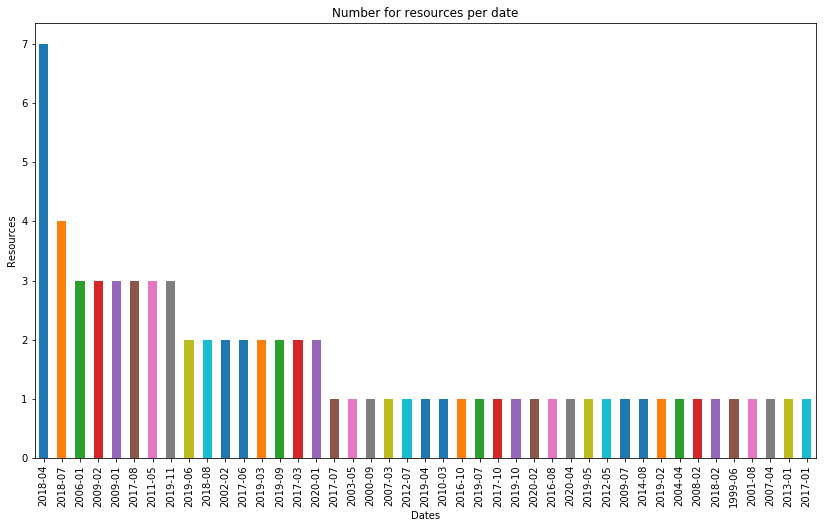

In [16]:
ax = df['date'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number for resources per date")
ax.set_xlabel("Dates")
ax.set_ylabel("Resources")
plt.show()

### Let's group the items by year

In [17]:
# First we create a new column in pandas with the year
df['year'] = pd.DatetimeIndex(df['date']).year

In [18]:
df['year']

0     2006
1     2006
2     2006
3     2020
4     2019
5     2004
6     2001
7     2017
8     2017
9     2018
10    2011
11    2011
12    2011
13    2016
14    2016
15    2019
16    2019
17    2019
18    2019
19    2019
20    2019
21    2020
22    2020
23    2017
24    2017
25    2017
26    2019
27    2020
28    2000
29    1999
      ... 
42    2018
43    2018
44    2018
45    2018
46    2018
47    2018
48    2018
49    2018
50    2019
51    2019
52    2019
53    2007
54    2019
55    2019
56    2019
57    2002
58    2002
59    2003
60    2007
61    2008
62    2009
63    2009
64    2009
65    2009
66    2009
67    2009
68    2012
69    2012
70    2013
71    2014
Name: year, Length: 72, dtype: int64

### Creating the chart by year

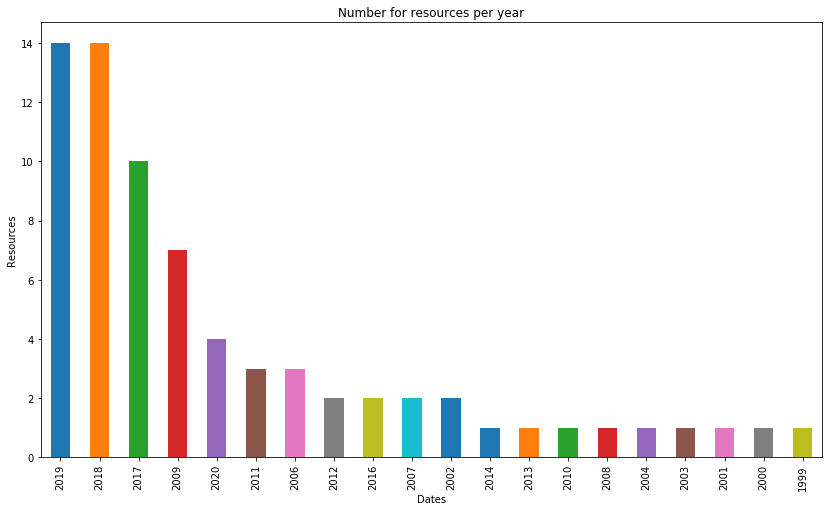

In [20]:
ax = df['year'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number for resources per year")
ax.set_xlabel("Dates")
ax.set_ylabel("Resources")
plt.show()

## Exploring the places

In [21]:
# Get unique values
places = pd.unique(df['place']).tolist()
strplaces = ''
for a in sorted(places):
    print(a)
    strplaces = strplaces + ' \"' + a.replace("http://sws.geonames.org/", "").replace("/", "") + '\"'

http://sws.geonames.org/1269750/
http://sws.geonames.org/2921044/
http://sws.geonames.org/6251999/
http://sws.geonames.org/6252001/
http://sws.geonames.org/6269131/


### Getting latitude and longitude from Wikidata

In [22]:
url = 'https://query.wikidata.org/sparql'
query = """
PREFIX bibo: <http://purl.org/ontology/bibo/>
SELECT ?idgeonames ?lat ?lon ?x ?xLabel 
WHERE {{ 
  values ?idgeonames {{ {0} }} 
  ?x wdt:P1566 ?idgeonames ; 
   p:P625 [
     psv:P625 [
       wikibase:geoLatitude ?lat ;
       wikibase:geoLongitude ?lon ;
       wikibase:geoGlobe ?globe ;
     ];
     ps:P625 ?coord
   ]
   SERVICE wikibase:label {{ bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }}
}}
"""

query = query.format(strplaces)
print(query)

# use json as a result
r = requests.get(url, params = {'format': 'json', 'query': query})
geopoints = r.json()


PREFIX bibo: <http://purl.org/ontology/bibo/>
SELECT ?idgeonames ?lat ?lon ?x ?xLabel 
WHERE { 
  values ?idgeonames {  "1269750" "2921044" "6251999" "6252001" "6269131" } 
  ?x wdt:P1566 ?idgeonames ; 
   p:P625 [
     psv:P625 [
       wikibase:geoLatitude ?lat ;
       wikibase:geoLongitude ?lon ;
       wikibase:geoGlobe ?globe ;
     ];
     ps:P625 ?coord
   ]
   SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
}



### Finally, we add the markers to the map

In [23]:
map = folium.Map(location=[0,0], zoom_start=1.5)

for geo in geopoints['results']['bindings']:
    idwikidata = geo['x']['value']
    lat = geo['lat']['value']
    lon = geo['lon']['value']
    idgeonames = geo['idgeonames']['value']
    label = geo['xLabel']['value']
    print(lat, lon)
    
    # adding a text to the popup
    count = places_by_number[['http://sws.geonames.org/' + idgeonames + '/']][0]
    popup = str(count) + " records published in <a hreh='" + str(idwikidata) + "'>" + label + "</a>"
    
    folium.Marker([lat,lon], popup= popup).add_to(map)

51.0 10.0
38.895 -77.036666666667
22.0 77.0
53.0 -1.0
56.0 -109.0


In [24]:
map